In [1]:
pip install "bertopic[all]"


Note: you may need to restart the kernel to use updated packages.


In [49]:
import pandas as pd
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

# 1. Nuskaitom tavo failą
df = pd.read_csv("bbc_news.csv")  

df.head()

,title,pubDate,guid,link,description
0,Ukraine: Angry Zelensky vows to punish Russian...,"Mon, 07 Mar 2022 08:01:56 GMT",https://www.bbc.co.uk/news/world-europe-60638042,https://www.bbc.co.uk/news/world-europe-606380...,The Ukrainian president says the country will ...
1,War in Ukraine: Taking cover in a town under a...,"Sun, 06 Mar 2022 22:49:58 GMT",https://www.bbc.co.uk/news/world-europe-60641873,https://www.bbc.co.uk/news/world-europe-606418...,"Jeremy Bowen was on the frontline in Irpin, as..."
2,Ukraine war 'catastrophic for global food',"Mon, 07 Mar 2022 00:14:42 GMT",https://www.bbc.co.uk/news/business-60623941,https://www.bbc.co.uk/news/business-60623941?a...,One of the world's biggest fertiliser firms sa...
3,Manchester Arena bombing: Saffie Roussos's par...,"Mon, 07 Mar 2022 00:05:40 GMT",https://www.bbc.co.uk/news/uk-60579079,https://www.bbc.co.uk/news/uk-60579079?at_medi...,The parents of the Manchester Arena bombing's ...
4,Ukraine conflict: Oil price soars to highest l...,"Mon, 07 Mar 2022 08:15:53 GMT",https://www.bbc.co.uk/news/business-60642786,https://www.bbc.co.uk/news/business-60642786?a...,Consumers are feeling the impact of higher ene...


In [50]:
# 2. Sukuriam vieną tekstinį stulpelį:
#   title + description (jei description trūksta - panaudojam tik title)

df["description"] = df["description"].fillna("")
df["title"] = df["title"].fillna("")

df["text"] = df["title"] + ". " + df["description"]
texts = df["text"].tolist()

len(texts), texts[0]


(42115,
 'Ukraine: Angry Zelensky vows to punish Russian atrocities. The Ukrainian president says the country will not forgive or forget those who murder its civilians.')

In [58]:
from sentence_transformers import SentenceTransformer
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer

def train_bertopic_with_embedding(texts, embed_model_name, nr_topics=6,
                                  min_topic_size=50):
    """
    texts            - dokumentų sąrašas (string'ai)
    embed_model_name - sentence-transformer modelio pavadinimas
    nr_topics        - kiek temų norim gauti
    min_topic_size   - minimali dokumentų skaičiaus riba temai
    """
    print(f"\n=== Treniruojame su embedding: {embed_model_name} ===")
    sentence_model = SentenceTransformer(embed_model_name)

    vectorizer_model = CountVectorizer(stop_words="english")  

    topic_model = BERTopic(
        embedding_model=sentence_model,
        nr_topics=nr_topics,
        min_topic_size=min_topic_size,
        language="english",
        calculate_probabilities=True,
        verbose=True,
        vectorizer_model=vectorizer_model  # <-- aktyvuojame stop-wordų šalinimą
    )

    topics, probs = topic_model.fit_transform(texts)
    return topic_model, topics, probs


In [59]:
#Pirmas modelis:
embed_model_1 = "all-MiniLM-L6-v2"

topic_model_1, topics_1, probs_1 = train_bertopic_with_embedding(
    texts,
    embed_model_name=embed_model_1,
    nr_topics=6,
    min_topic_size=50
)



=== Treniruojame su embedding: all-MiniLM-L6-v2 ===


2025-11-23 20:34:11,180 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/1317 [00:00<?, ?it/s]

2025-11-23 20:34:52,973 - BERTopic - Embedding - Completed ✓
2025-11-23 20:34:52,974 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-11-23 20:35:00,274 - BERTopic - Dimensionality - Completed ✓
2025-11-23 20:35:00,277 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-11-23 20:35:11,130 - BERTopic - Cluster - Completed ✓
2025-11-23 20:35:11,130 - BERTopic - Representation - Extracting topics using c-TF-IDF for topic reduction.
2025-11-23 20:35:11,509 - BERTopic - Representation - Completed ✓
2025-11-23 20:35:11,510 - BERTopic - Topic reduction - Reducing number of topics
2025-11-23 20:35:11,530 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-11-23 20:35:11,823 - BERTopic - Representation - Completed ✓
2025-11-23 20:35:11,826 - BERTopic - Topic reduction - Reduced number of topics from 103 to 6


In [60]:
# Bendroji informacija apie temas
topic_info_1 = topic_model_1.get_topic_info()
topic_info_1

,Topic,Count,Name,Representation,Representative_Docs
0,-1,14760,-1_says_bbc_new_uk,"[says, bbc, new, uk, people, year, police, say...",[Tax cuts will be considered if inflation fall...
1,0,11215,0_england_world_cup_win,"[england, world, cup, win, final, league, says...",[Wales v England: Which players need to impres...
2,1,8638,1_ukraine_war_russia_russian,"[ukraine, war, russia, russian, gaza, says, uk...",[Ukraine war: Kremlin says 20 dead after attac...
3,2,4529,2_police_murder_dies_trump,"[police, murder, dies, trump, man, died, old, ...",[Olivia Pratt-Korbel: Man charged with schoolg...
4,3,2572,3_energy_rates_cost_covid,"[energy, rates, cost, covid, uk, bills, says, ...",[What are UK interest rates and when will they...
5,4,401,4_museum_banksy_stolen_000,"[museum, banksy, stolen, 000, auction, artist,...",[Painting stolen in art heist more than 30 yea...


In [61]:
for topic_id in range(6):
    print(f"\n=== Tema {topic_id} ===")
    print(topic_model_1.get_topic(topic_id))   



=== Tema 0 ===
[('england', np.float64(0.045923259293006655)), ('world', np.float64(0.04523037155991139)), ('cup', np.float64(0.04393470572651303)), ('win', np.float64(0.03300866297201161)), ('final', np.float64(0.028911692612457296)), ('league', np.float64(0.023807289578266395)), ('says', np.float64(0.023763867771084708)), ('women', np.float64(0.02083094924340545)), ('2022', np.float64(0.019025074828846918)), ('day', np.float64(0.01891973961710876))]

=== Tema 1 ===
[('ukraine', np.float64(0.0685779056831036)), ('war', np.float64(0.04910685177696148)), ('russia', np.float64(0.041287079323760745)), ('russian', np.float64(0.034987296390712457)), ('gaza', np.float64(0.02919602221443591)), ('says', np.float64(0.029167499932384048)), ('uk', np.float64(0.027879618652415478)), ('israel', np.float64(0.02732351508883655)), ('papers', np.float64(0.02253648010647551)), ('people', np.float64(0.020449774141241613))]

=== Tema 2 ===
[('police', np.float64(0.04291210763144042)), ('murder', np.float

In [11]:
# temai 2ai pažiūrėti kelis tekstus
topic_id = 1
docs_in_topic_1 = [texts[i] for i, t in enumerate(topics_1) if t == topic_id]

len(docs_in_topic_1)
docs_in_topic_1[:5]  # pirmos 5 naujienos temoje 0


['England bowler Robinson ruled out of first Test with back injury. England seam bowler Ollie Robinson has been ruled out of the first Test against West Indies with a back injury.',
 'Welsh Open: Joe Perry beats Judd Trump to win title. Joe Perry beats Judd Trump 9-5 to win the Welsh Open title for the first time at Celtic Manor Resort in Newport.',
 "GB ski pairings win two more Paralympic bronzes. Britain's Menna Fitzpatrick and Neil Simpson both win their second medals of the Beijing Winter Paralympics with super combined bronze.",
 "'Phil Foden sets the tempo' - how Man City 'steamrollered' Man Utd. Match of the Day 2's Danny Murphy and Troy Deeney analyse how the combination play between Phil Foden and Kevin de Bruyne helped Manchester City beat Manchester United 4-1.",
 "WSL highlights: Arsenal survive scare to beat Birmingham and extend WSL lead. Vivianne Miedema becomes the first player to reach 100 Women's Super League goal contributions as leaders Arsenal see off a late Birmi

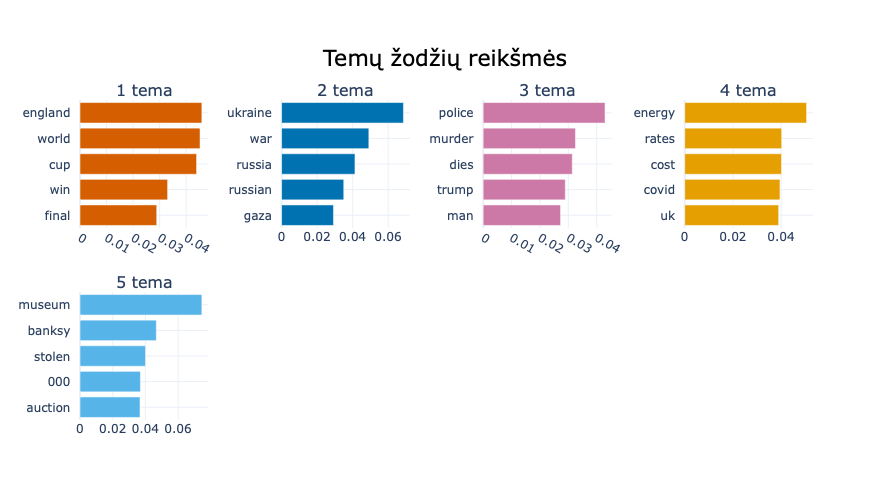

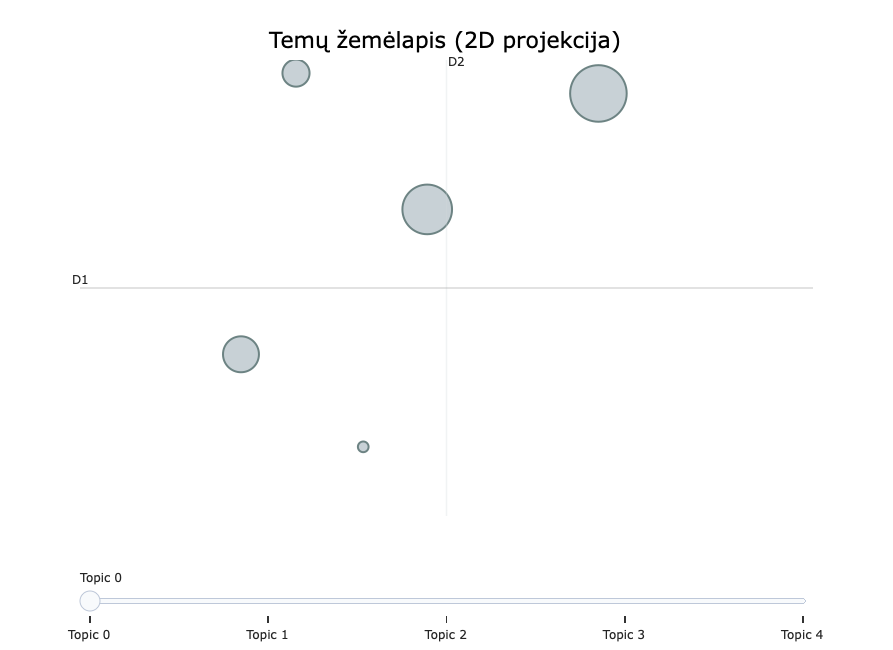

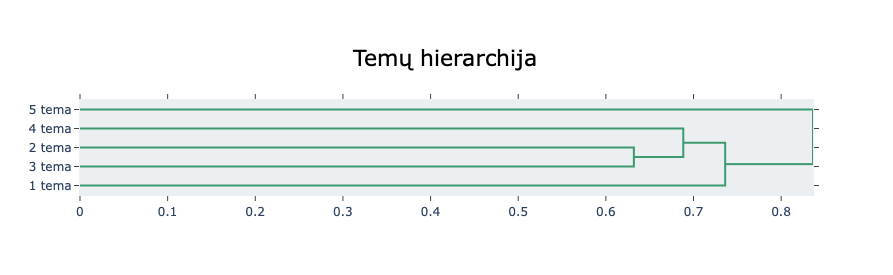

In [62]:
# ---- Create new labels ----
topic_ids = topic_model_1.get_topic_info().Topic.tolist()
topic_ids = [t for t in topic_ids if t != -1]

new_labels = {topic_id: f"{topic_id + 1} tema" for topic_id in topic_ids}
new_labels[-1] = "Kitos (nepriskirtos)"

topic_model_1.set_topic_labels(new_labels)

# ---- 1) Barchart with custom labels + custom title ----
fig_bar = topic_model_1.visualize_barchart(
    top_n_topics=7,
    custom_labels=new_labels
)

fig_bar.update_layout(title_text="Temų žodžių reikšmės")
fig_bar.show()

# ---- 2) 2D topics with custom labels + custom title ----
fig_topics = topic_model_1.visualize_topics(
    custom_labels=new_labels
)

fig_topics.update_layout(title_text="Temų žemėlapis (2D projekcija)")
fig_topics.show()

# ---- 3) Hierarchy with custom labels + custom title ----
fig_h = topic_model_1.visualize_hierarchy(
    custom_labels=new_labels
)

fig_h.update_layout(title_text="Temų hierarchija")
fig_h.show()



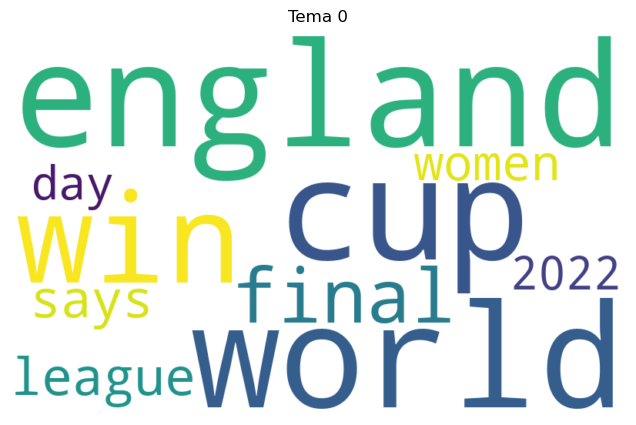

<Figure size 1200x800 with 0 Axes>

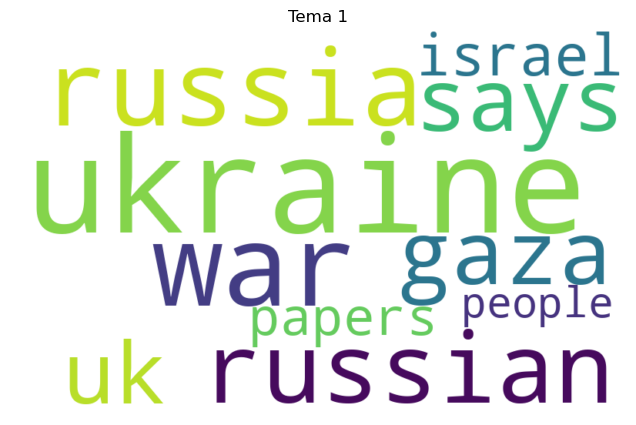

<Figure size 1200x800 with 0 Axes>

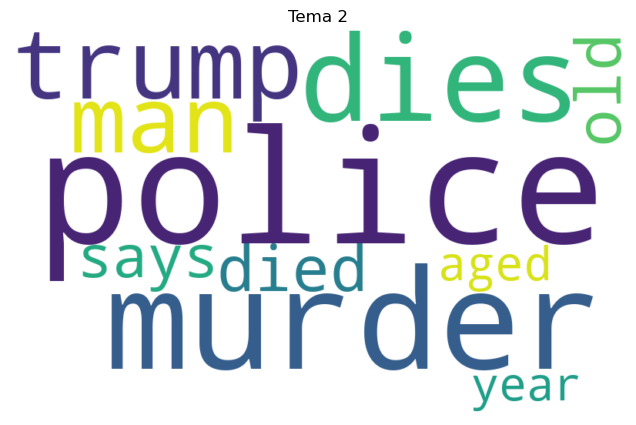

<Figure size 1200x800 with 0 Axes>

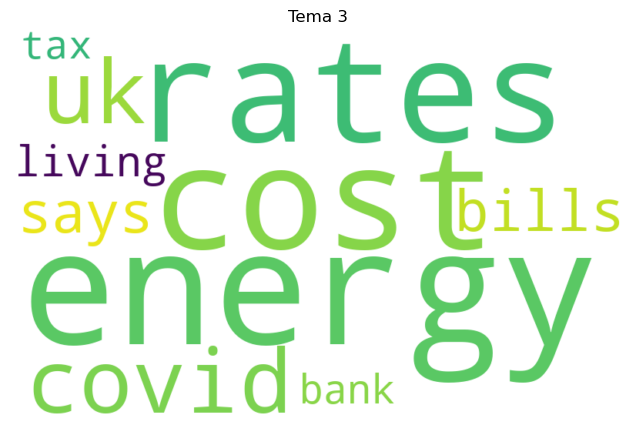

<Figure size 1200x800 with 0 Axes>

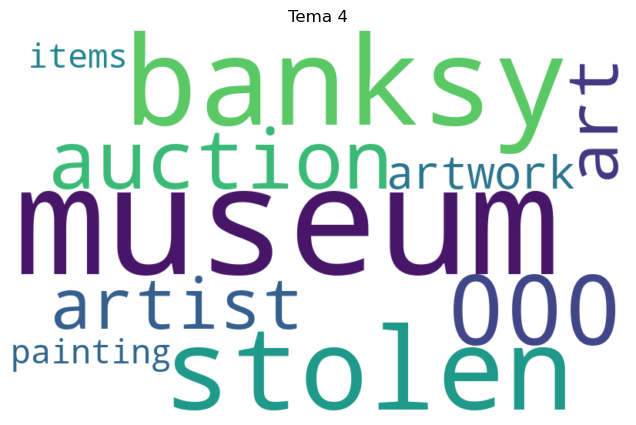

NameError: name 'wordcloud' is not defined

<Figure size 1200x800 with 0 Axes>

In [63]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

topics = topic_model_1.get_topics()

for topic_num in topics:
    if topic_num == -1:
        continue  # praleidžiam outlier cluster

    words = topic_model_1.get_topic(topic_num)
    word_freq = {w: v for w, v in words}

    wc = WordCloud(width=800, height=500, background_color="white")
    wc = wc.generate_from_frequencies(word_freq)

    plt.figure(figsize=(9, 5))
    plt.title(f"Tema {topic_num}")
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis("off")

import os
os.getcwd()
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)  # or your Matplotlib figure
plt.axis("off")


In [64]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary

# 1. Get topic words from BERTopic
topics = topic_model_1.get_topics()

topic_words = []
for topic_id, words in topics.items():
    if topic_id != -1:
        topic_words.append([w for w, _ in words])

# 2. Prepare texts for gensim
tokenized_texts = [t.split() for t in texts]

# 3. Create dictionary (required!)
dictionary = Dictionary(tokenized_texts)

# 4. Compute coherence
cm = CoherenceModel(
    topics=topic_words,
    texts=tokenized_texts,
    dictionary=dictionary,
    coherence='c_v'
)

coherence_score = cm.get_coherence()
print("Topic Coherence (c_v):", coherence_score)



huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

Topic Coherence (c_v): 0.4044480510556882
